In [1]:
using Plots
using LaTeXStrings
using DifferentialEquations

In [4]:
function euler(ivp, n)
    # Time discretization
    a, b = ivp.tspan
    h = (b-a)/n
    t = [a + i*h for i in 0:n]

    # Initial condition and output setup.
    u = fill(float(ivp.u0), n+1)
    
    # The ti,e stepping iteration.
    for i in 1:n
        u[i+1] = u[i] + h*ivp.f(u[i], ivp.p, t[i])
    end

    return t, u
end


euler (generic function with 1 method)

In [5]:
f = (u, p, t) -> sin((t+u)^2);

tspan = (0.0, 4.0);

u0 = -1.0;

ivp = ODEProblem(f, u0, tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 4.0)
u0: -1.0

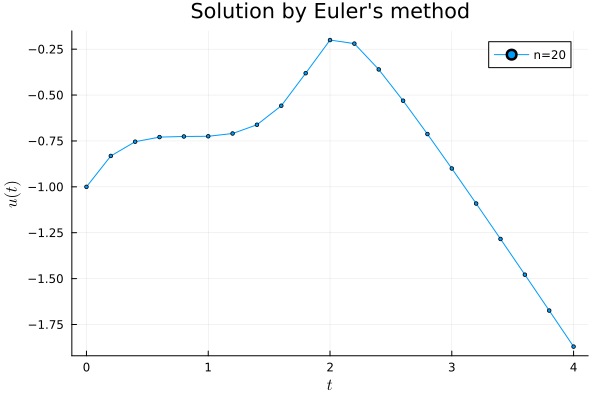

In [6]:
t, u = euler(ivp, 20)

plot(t, u, m=2, label="n=20", 
xlabel = L"t", ylabel=L"u(t)", title = "Solution by Euler's method")

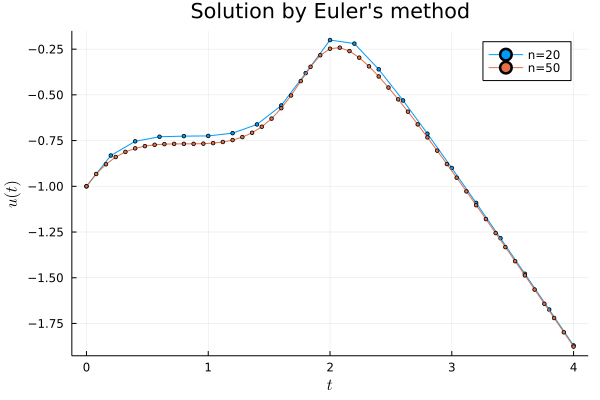

In [5]:
t,u = euler(ivp,50)
plot!(t,u,m=2,label="n=50")

Ex. Given equation
$$
(1+t^3)uu' = t^2,\ 0 \le xt \le 3, \ u(0) =1;\ \hat{u}(t) = [1+(2/3)\ln (1+xt^3)]^{1/2}
$$

- Plot the solution for $n = 230$.
- For $ n = 10*2^k, k = 2, 3, \cdots, 10$, compute the error at the final time and make a log-log convergence plot, including a reference line for first-order convergence.

In [74]:
f = (u, p, t) -> t^2 / ((1 + t^3) * u);

# x = 2 
tspan = (0.0, 3.0);

u₀ = 1.0;

ivp = ODEProblem(f, u₀, tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 3.0)
u0: 1.0

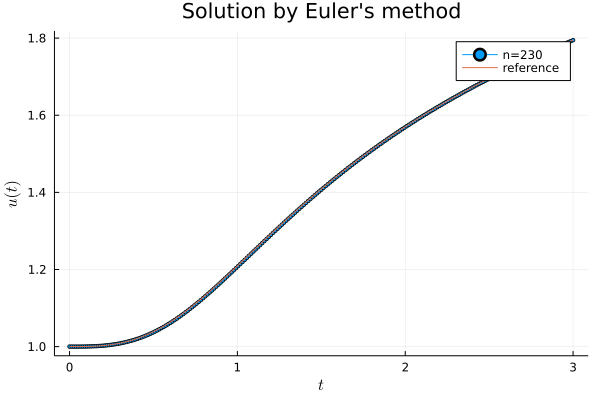

In [96]:
t, u = euler(ivp, 230);

plot(t, u, m=2, label="n=230", 
xlabel = L"t", ylabel=L"u(t)", title = "Solution by Euler's method")

plot!(t, t->((1+(2/3)*log(1 + t^3)))^(1/2), label="reference")

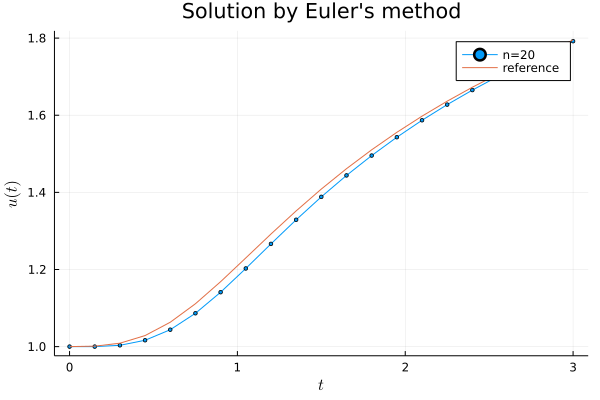

In [75]:
t, u = euler(ivp, 20);

plot(t, u, m=2, label="n=20", 
xlabel = L"t", ylabel=L"u(t)", title = "Solution by Euler's method")

plot!(t, t->((1+(2/3)*log(1 + t^3)))^(1/2), label="reference")

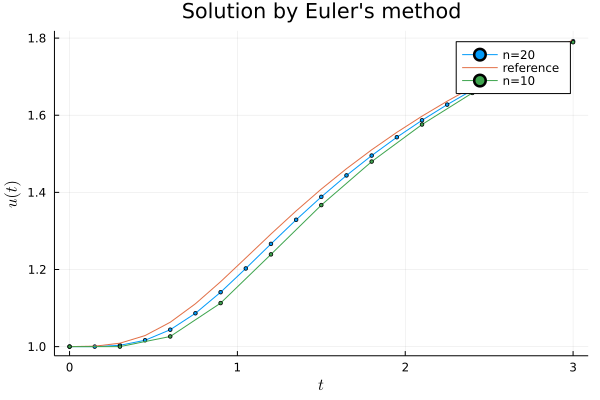

In [76]:
t, u = euler(ivp, 10);

plot!(t, u, m = 2, label="n=10")

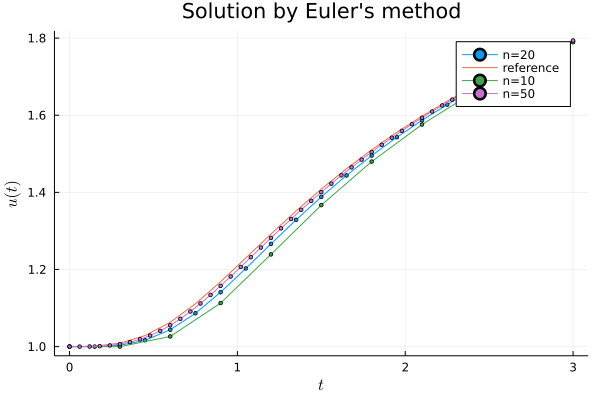

In [77]:
t, u = euler(ivp, 50);

plot!(t, u, m = 2, label="n=50")

In [78]:
# for i in 2:10
#     println(i)
# end

In [68]:
candidate_n = [10 * 2^k for k in 2:10];
last_errors = Vector{Float64}();

In [79]:
for n in candidate_n
    t, u = euler(ivp, n);
    u_hat = x->((1+(2/3)*log(1 + x^3)))^(1/2);
    u_hat_value = [u_hat(tt) for tt in t];
    error = [abs(uu) for uu in (u - u_hat_value)];
    append!(last_errors, error[end]);
end

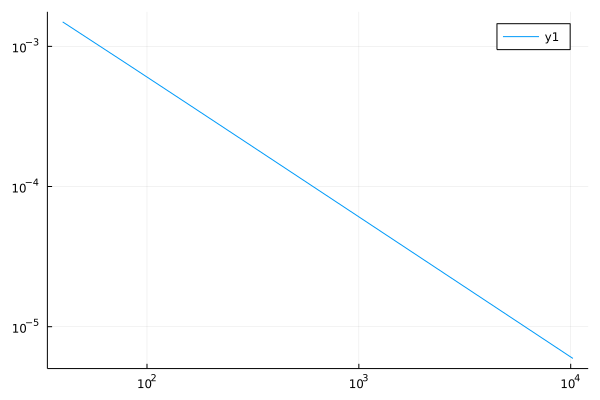

In [82]:
plot(candidate_n, last_errors, xaxis=:log, yaxis=:log)

In [92]:
a = [log(er) for er in last_errors]

9-element Vector{Float64}:
  -6.506392863165925
  -7.190513712429549
  -7.8793356600525675
  -8.570365426029527
  -9.262464989034012
  -9.95509110761208
 -10.647978440359507
 -11.340995868287335
 -12.034078214861532

In [93]:
b = [log(n) for n in candidate_n]

9-element Vector{Float64}:
 3.6888794541139363
 4.382026634673881
 5.075173815233827
 5.768320995793772
 6.461468176353717
 7.154615356913663
 7.847762537473608
 8.540909718033554
 9.234056898593499

In [95]:
a .+ b
# which is a constant
# log(er) + log(n) = constant
# er = c/n

9-element Vector{Float64}:
 -2.817513409051989
 -2.808487077755668
 -2.804161844818741
 -2.802044430235755
 -2.800996812680294
 -2.8004757506984177
 -2.800215902885899
 -2.8000861502537813
 -2.800021316268033